## WIDS Competition 2022

### Data Dictionary
##### Covariates

id: building id

Year_Factor: anonymized year in which the weather and energy usage factors were observed

State_Factor: anonymized state in which the building is located

building_class: building classification

facility_type: building usage type

floor_area: floor area (in square feet) of the building

year_built: year in which the building was constructed

energy_star_rating: the energy star rating of the building

ELEVATION: elevation of the building location

january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

precipitation_inches: annual precipitation in inches at the location of the building

snowfall_inches: annual snowfall in inches at the location of the building

snowdepth_inches: annual snow depth in inches at the location of the building

avg_temp: average temperature over a year at the location of the building

days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building

days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building

days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building

days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building

days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building

days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building

direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

max_wind_speed: maximum wind speed at the location of the building

days_with_fog: number of days with fog at the location of the building

##### Target

site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills


In [ ]:
# -*- coding: utf-8 -*-
'''
Description: This script is used to test out various 
variable selection methods for the energy model
Contents:
How To Use:
Contributors: rxu17
'''

import time
import os
import sys
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

# for feature engineering
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler


# for splitting data
from sklearn.model_selection import train_test_split

# for our various model trainings
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# scoring
from sklearn.metrics import accuracy_score

Read in our training data and test data

In [3]:
input_df = pd.read_csv("{}/train.csv".format(os.getcwd()))

In [83]:
os.getcwd()

'/Users/rexxx/widsdatathon2022'

In [84]:
__file__

NameError: name '__file__' is not defined

In [4]:
input_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [7]:
features = list(input_df.columns)
target = ['site_eui'] # our target var
features = [f for f in features if f not in features_to_excl]

In [69]:
# split our data into 80% training, 20% validation for now
validate_size = 0.2
train_data, validation_data = \
    train_test_split(input_df, test_size=validate_size, random_state=6)

In [15]:
# data types of the columns (first 32)
print(train_data[train_data.columns[:32]].dtypes)

Year_Factor             int64
State_Factor           object
building_class         object
facility_type          object
floor_area            float64
year_built            float64
energy_star_rating    float64
ELEVATION             float64
january_min_temp        int64
january_avg_temp      float64
january_max_temp        int64
february_min_temp       int64
february_avg_temp     float64
february_max_temp       int64
march_min_temp          int64
march_avg_temp        float64
march_max_temp          int64
april_min_temp          int64
april_avg_temp        float64
april_max_temp          int64
may_min_temp            int64
may_avg_temp          float64
may_max_temp            int64
june_min_temp           int64
june_avg_temp         float64
june_max_temp           int64
july_min_temp           int64
july_avg_temp         float64
july_max_temp           int64
august_min_temp         int64
august_avg_temp       float64
august_max_temp         int64
dtype: object


In [17]:
# data types of the columns (32 to 64)
print(train_data[train_data.columns[32:]].dtypes)

september_min_temp             int64
september_avg_temp           float64
september_max_temp             int64
october_min_temp               int64
october_avg_temp             float64
october_max_temp               int64
november_min_temp              int64
november_avg_temp            float64
november_max_temp              int64
december_min_temp              int64
december_avg_temp            float64
december_max_temp              int64
cooling_degree_days            int64
heating_degree_days            int64
precipitation_inches         float64
snowfall_inches              float64
snowdepth_inches               int64
avg_temp                     float64
days_below_30F                 int64
days_below_20F                 int64
days_below_10F                 int64
days_below_0F                  int64
days_above_80F                 int64
days_above_90F                 int64
days_above_100F                int64
days_above_110F                int64
direction_max_wind_speed     float64
d

In [18]:
# print the unique values in each columns
print(train_data[train_data.columns[:32]].apply(lambda col: col.unique()))

Year_Factor                                          [2, 3, 6, 4, 5, 1]
State_Factor          [State_6, State_11, State_8, State_1, State_2,...
building_class                                [Residential, Commercial]
facility_type         [Multifamily_Uncategorized, Office_Uncategoriz...
floor_area            [224000.0, 61200.0, 221857.0, 64488.0, 83753.0...
year_built            [1951.0, 1936.0, 1970.0, 1909.0, 1900.0, 1911....
energy_star_rating    [nan, 81.0, 21.0, 73.0, 53.0, 86.0, 38.0, 5.0,...
ELEVATION             [42.7, 11.9, 15.2, 26.5, 18.3, 3.4, 9.1, 2.4, ...
january_min_temp      [13, 11, 28, 4, 29, 27, 37, 41, 6, 8, 15, 26, ...
january_avg_temp      [37.32258065, 35.08064516, 43.45161289999999, ...
january_max_temp      [62, 61, 56, 58, 63, 67, 77, 59, 69, 73, 53, 6...
february_min_temp     [20, 17, 34, 9, 32, 12, 36, -1, 33, 42, 15, 2,...
february_avg_temp     [40.87931034, 33.91071429, 47.67241379, 31.625...
february_max_temp     [62, 55, 64, 56, 75, 61, 78, 71, 67, 43, 5

In [19]:
# print the unique values in each columns
print(train_data[train_data.columns[32:]].apply(lambda col: col.unique()))

september_min_temp           [53, 47, 44, 52, 40, 54, 49, 56, 51, 45, 46, 4...
september_avg_temp           [68.8, 67.86666667, 61.38333333, 69.73333333, ...
september_max_temp           [91, 96, 79, 92, 80, 93, 105, 97, 94, 83, 86, ...
october_min_temp             [38, 40, 39, 42, 46, 28, 49, 43, 51, 55, 33, 3...
october_avg_temp             [58.04838710000001, 60.19354839, 55.40322581, ...
october_max_temp             [78, 86, 68, 77, 74, 96, 85, 100, 84, 95, 88, ...
november_min_temp            [31, 23, 40, 22, 27, 17, 29, 34, 35, 44, 46, 3...
november_avg_temp            [43.86666667, 45.25, 51.28333333, 45.3, 44.466...
november_max_temp            [66, 70, 71, 69, 59, 75, 72, 79, 76, 74, 77, 8...
december_min_temp            [28, 19, 24, 29, 12, 17, 36, 41, 22, 34, 26, -...
december_avg_temp            [41.46774194, 38.54838710000001, 38.53225806, ...
december_max_temp            [62, 71, 51, 65, 58, 69, 68, 60, 63, 72, 59, 5...
cooling_degree_days          [1277, 1272, 260, 1128,

In [21]:
# see proportion of nans in each columns
print(train_data[train_data.columns[:32]].apply(lambda col: col.isna().sum()*100/len(train_data)))

Year_Factor            0.000000
State_Factor           0.000000
building_class         0.000000
facility_type          0.000000
floor_area             0.000000
year_built             2.357891
energy_star_rating    35.147265
ELEVATION              0.000000
january_min_temp       0.000000
january_avg_temp       0.000000
january_max_temp       0.000000
february_min_temp      0.000000
february_avg_temp      0.000000
february_max_temp      0.000000
march_min_temp         0.000000
march_avg_temp         0.000000
march_max_temp         0.000000
april_min_temp         0.000000
april_avg_temp         0.000000
april_max_temp         0.000000
may_min_temp           0.000000
may_avg_temp           0.000000
may_max_temp           0.000000
june_min_temp          0.000000
june_avg_temp          0.000000
june_max_temp          0.000000
july_min_temp          0.000000
july_avg_temp          0.000000
july_max_temp          0.000000
august_min_temp        0.000000
august_avg_temp        0.000000
august_m

In [22]:
# see proportion of nans in each columns
print(train_data[train_data.columns[32:]].apply(lambda col: col.isna().sum()*100/len(train_data)))

september_min_temp            0.000000
september_avg_temp            0.000000
september_max_temp            0.000000
october_min_temp              0.000000
october_avg_temp              0.000000
october_max_temp              0.000000
november_min_temp             0.000000
november_avg_temp             0.000000
november_max_temp             0.000000
december_min_temp             0.000000
december_avg_temp             0.000000
december_max_temp             0.000000
cooling_degree_days           0.000000
heating_degree_days           0.000000
precipitation_inches          0.000000
snowfall_inches               0.000000
snowdepth_inches              0.000000
avg_temp                      0.000000
days_below_30F                0.000000
days_below_20F                0.000000
days_below_10F                0.000000
days_below_0F                 0.000000
days_above_80F                0.000000
days_above_90F                0.000000
days_above_100F               0.000000
days_above_110F          

In [23]:
train_data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
19399,2,State_6,Residential,Multifamily_Uncategorized,224000.0,1951.0,NaN,42.7,13,37.322581,...,72,17,0,0,1.0,1.0,1.0,99.0,69.121911,19399
25744,3,State_6,Residential,Multifamily_Uncategorized,61200.0,1936.0,NaN,11.9,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,97.786575,25744
28898,3,State_6,Residential,Multifamily_Uncategorized,221857.0,1970.0,NaN,15.2,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,67.642294,28898
73306,6,State_11,Commercial,Office_Uncategorized,64488.0,1909.0,81.0,26.5,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,44.718743,73306
16689,2,State_6,Commercial,Lodging_Hotel,83753.0,1900.0,21.0,42.7,13,37.322581,...,72,17,0,0,1.0,1.0,1.0,99.0,89.249098,16689


['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'da

NameError: name 'plt' is not defined

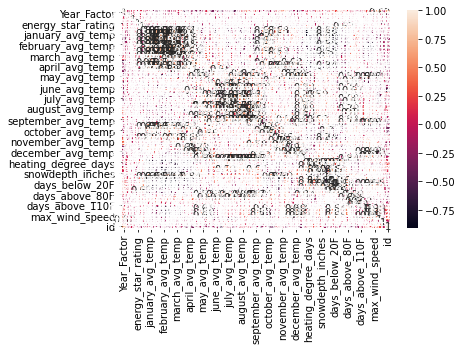

In [27]:
# only float or int columns and produce a heatmap
num_cols = train_data.select_dtypes(include=np.number).columns.tolist()
print(num_cols)
sns.heatmap(train_data[num_cols].corr(), annot=True)
plt.show()

In [31]:
cor_mat = train_data.corr()
cor_mat

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.035329,0.084385,-0.003618,0.134176,0.008855,-0.098796,-0.289545,-0.391054,-0.101456,...,0.185382,0.055488,-0.043697,-0.014122,0.231877,0.214746,0.234204,0.618256,-0.043811,0.532350
floor_area,-0.035329,1.000000,0.101912,0.032387,0.098971,-0.149415,-0.138563,-0.104224,-0.105629,-0.120036,...,0.047607,0.019701,-0.030943,-0.009110,0.000331,-0.002970,-0.000236,0.019144,0.074456,-0.093034
year_built,0.084385,0.101912,1.000000,-0.072203,0.050761,-0.013869,-0.036287,-0.083292,-0.003596,-0.023134,...,-0.035467,-0.005859,-0.057867,NaN,0.002837,-0.007845,0.006683,0.083251,0.016925,0.053118
energy_star_rating,-0.003618,0.032387,-0.072203,1.000000,-0.012690,0.143804,0.148938,0.079509,0.125619,0.137550,...,-0.076355,0.020470,0.058719,NaN,-0.004288,-0.001997,-0.003149,0.021271,-0.515991,-0.025282
ELEVATION,0.134176,0.098971,0.050761,-0.012690,1.000000,-0.259263,-0.237172,-0.351140,-0.155529,-0.187068,...,0.057847,0.179410,0.104321,0.089064,0.058781,0.083071,0.048360,0.496964,0.009414,-0.201985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
direction_peak_wind_speed,0.214746,-0.002970,-0.007845,-0.001997,0.083071,-0.161472,-0.257158,-0.281205,-0.329161,-0.679579,...,0.464444,-0.027326,-0.028532,0.019509,0.999785,1.000000,0.992246,0.333325,0.019489,0.206584
max_wind_speed,0.234204,-0.000236,0.006683,-0.003149,0.048360,-0.163545,-0.270966,-0.301762,-0.349806,-0.694251,...,0.489424,-0.024172,-0.020287,0.015048,0.988828,0.992246,1.000000,0.357071,0.016336,0.214511
days_with_fog,0.618256,0.019144,0.083251,0.021271,0.496964,-0.040233,-0.111777,-0.323240,-0.288489,-0.177467,...,0.083961,0.051404,-0.197246,NaN,0.333606,0.333325,0.357071,1.000000,-0.050989,0.298134
site_eui,-0.043811,0.074456,0.016925,-0.515991,0.009414,-0.176230,-0.165011,-0.093573,-0.146283,-0.152945,...,0.084175,-0.010965,-0.050307,-0.014077,0.015815,0.019489,0.016336,-0.050989,1.000000,-0.023768


In [38]:
# correlation of covariates against site_eui
cor_mat['site_eui'].loc[abs(cor_mat['site_eui']) >= 0.1]

energy_star_rating     -0.515991
january_min_temp       -0.176230
january_avg_temp       -0.165011
february_min_temp      -0.146283
february_avg_temp      -0.152945
february_max_temp      -0.108632
march_min_temp         -0.131601
march_avg_temp         -0.133985
april_min_temp         -0.110489
april_avg_temp         -0.111773
june_avg_temp           0.119016
july_min_temp           0.108438
july_avg_temp           0.132817
august_avg_temp         0.112900
september_avg_temp      0.108127
cooling_degree_days     0.123958
heating_degree_days     0.145519
precipitation_inches    0.111070
snowfall_inches         0.156656
snowdepth_inches        0.113238
days_below_30F          0.137373
days_below_20F          0.117435
site_eui                1.000000
Name: site_eui, dtype: float64

In [39]:
# cross correlation of more informative variables
var_interest = list(cor_mat['site_eui'].loc[abs(cor_mat['site_eui']) >= 0.1].keys())
train_data[var_interest].corr()

,energy_star_rating,january_min_temp,january_avg_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,april_min_temp,april_avg_temp,...,august_avg_temp,september_avg_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,days_below_30F,days_below_20F,site_eui
energy_star_rating,1.000000,0.143804,0.148938,0.125619,0.137550,0.105850,0.135347,0.138365,0.103887,0.098102,...,-0.094855,-0.090818,-0.100535,-0.130697,-0.110272,-0.143928,-0.114948,-0.131033,-0.112718,-0.515991
january_min_temp,0.143804,1.000000,0.970986,0.812171,0.856569,0.526791,0.863024,0.757501,0.705861,0.705887,...,-0.532449,-0.465990,-0.543774,-0.890640,-0.570285,-0.753811,-0.554139,-0.863378,-0.776123,-0.176230
january_avg_temp,0.148938,0.970986,1.000000,0.829934,0.910906,0.605836,0.907603,0.818697,0.703598,0.717380,...,-0.506857,-0.461133,-0.500747,-0.906948,-0.619885,-0.798571,-0.642659,-0.889924,-0.837889,-0.165011
february_min_temp,0.125619,0.812171,0.829934,1.000000,0.803657,0.566978,0.708806,0.555220,0.847735,0.596580,...,-0.709585,-0.664128,-0.658442,-0.700528,-0.352794,-0.772571,-0.535188,-0.714744,-0.707802,-0.146283
february_avg_temp,0.137550,0.856569,0.910906,0.803657,1.000000,0.821606,0.901107,0.887460,0.579097,0.600840,...,-0.470051,-0.521515,-0.506633,-0.818165,-0.472312,-0.784897,-0.722638,-0.854304,-0.886817,-0.152945
february_max_temp,0.105850,0.526791,0.605836,0.566978,0.821606,1.000000,0.655186,0.753736,0.293579,0.442833,...,-0.343644,-0.359164,-0.347603,-0.589613,-0.322094,-0.672875,-0.735745,-0.511473,-0.646135,-0.108632
march_min_temp,0.135347,0.863024,0.907603,0.708806,0.901107,0.655186,1.000000,0.840687,0.504066,0.606204,...,-0.340069,-0.411321,-0.360273,-0.796750,-0.493761,-0.706321,-0.704050,-0.835608,-0.886354,-0.131601
march_avg_temp,0.138365,0.757501,0.818697,0.555220,0.887460,0.753736,0.840687,1.000000,0.414689,0.570798,...,-0.168699,-0.239924,-0.255930,-0.805258,-0.640559,-0.749257,-0.703671,-0.806769,-0.761330,-0.133985
april_min_temp,0.103887,0.705861,0.703598,0.847735,0.579097,0.293579,0.504066,0.414689,1.000000,0.695905,...,-0.541766,-0.389101,-0.482214,-0.702423,-0.331074,-0.563099,-0.245629,-0.711511,-0.557107,-0.110489
april_avg_temp,0.098102,0.705887,0.717380,0.596580,0.600840,0.442833,0.606204,0.570798,0.695905,1.000000,...,-0.182502,0.057172,-0.112591,-0.884258,-0.564945,-0.472119,-0.297632,-0.639018,-0.559321,-0.111773


In [81]:
# potential variable transformations

# change months from wide to long (as a time variable)
# convert days_below_30F to days_below_30F and days_above_20F, by method of subtracting days_above_20F - days_above_30F
# could change days to a percentage so there is a "bound" on the number (scaling it almost out of 100)

# factorize building_class, and facility_type (try two methods for these), 
# make them into factors or make them into dummy variables and see if correlation improves

# since energy_star_rating explains site_eui the most, could try to see if we could fill it in with other variables (35% missingness is a lot)

# redundant variables
# new variable of avg_temp, as keeping min_temp, avg_temp and max_temp is too redundant

# avg_temp vars and the _degree_days and below_<some temp in F> vars are all redundant, 
# so we have to keep one set or the other
tmp_vars = [var for var in train_data.columns if var.endswith("avg_temp")]
tmp_var_names = list(range(1, len(tmp_vars)+1))

tmp_var_names_dict = {tmp_vars[i]:"month{}_avg_temp".format(tmp_var_names[i]) for i in range(len(tmp_var_names))}
non_tmp_var = [var for var in train_data.columns if not 'temp' in var]

train_data_reshaped = train_data.rename(tmp_var_names_dict, axis = 1)
train_data_reshaped.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,month1_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
19399,2,State_6,Residential,Multifamily_Uncategorized,224000.0,1951.0,NaN,42.7,13,37.322581,...,72,17,0,0,1.0,1.0,1.0,99.0,69.121911,19399
25744,3,State_6,Residential,Multifamily_Uncategorized,61200.0,1936.0,NaN,11.9,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,97.786575,25744
28898,3,State_6,Residential,Multifamily_Uncategorized,221857.0,1970.0,NaN,15.2,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,67.642294,28898
73306,6,State_11,Commercial,Office_Uncategorized,64488.0,1909.0,81.0,26.5,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,44.718743,73306
16689,2,State_6,Commercial,Lodging_Hotel,83753.0,1900.0,21.0,42.7,13,37.322581,...,72,17,0,0,1.0,1.0,1.0,99.0,89.249098,16689


In [82]:
# correlation of numeric covariates against energy_star_rating
cor_mat['energy_star_rating'].loc[abs(cor_mat['energy_star_rating']) >= 0.1]

energy_star_rating      1.000000
january_min_temp        0.143804
january_avg_temp        0.148938
february_min_temp       0.125619
february_avg_temp       0.137550
february_max_temp       0.105850
march_min_temp          0.135347
march_avg_temp          0.138365
april_min_temp          0.103887
april_max_temp          0.103785
june_avg_temp          -0.107181
july_avg_temp          -0.108284
cooling_degree_days    -0.100535
heating_degree_days    -0.130697
precipitation_inches   -0.110272
snowfall_inches        -0.143928
snowdepth_inches       -0.114948
days_below_30F         -0.131033
days_below_20F         -0.112718
site_eui               -0.515991
Name: energy_star_rating, dtype: float64

In [77]:
train_data_melt = pd.melt(frame=train_data_reshaped[non_tmp_var + list(tmp_var_names_dict.values())], 
                        id_vars=non_tmp_var, value_vars=list(tmp_var_names_dict.values()),
                        var_name='month', value_name='avg_temp')
train_data_melt.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,...,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,month,avg_temp
0,2,State_6,Residential,Multifamily_Uncategorized,224000.0,1951.0,NaN,42.7,1277,3978,...,0,0,1.0,1.0,1.0,99.0,69.121911,19399,avg_temp1,37.322581
1,3,State_6,Residential,Multifamily_Uncategorized,61200.0,1936.0,NaN,11.9,1272,4670,...,0,0,NaN,NaN,NaN,NaN,97.786575,25744,avg_temp1,35.080645
2,3,State_6,Residential,Multifamily_Uncategorized,221857.0,1970.0,NaN,15.2,1272,4670,...,0,0,NaN,NaN,NaN,NaN,67.642294,28898,avg_temp1,35.080645
3,6,State_11,Commercial,Office_Uncategorized,64488.0,1909.0,81.0,26.5,260,3772,...,0,0,NaN,NaN,NaN,NaN,44.718743,73306,avg_temp1,43.451613
4,2,State_6,Commercial,Lodging_Hotel,83753.0,1900.0,21.0,42.7,1277,3978,...,0,0,1.0,1.0,1.0,99.0,89.249098,16689,avg_temp1,37.322581


What is EUI? 
Essentially, EUI expresses a building’s energy use as a function of its size or other characteristics.For property types in Portfolio Manager, EUI is expressed as energy per square foot per year. It’s calculated by dividing the total energy consumed by the building in one year (measured in kBtu or GJ) by the total gross floor area of the building (measured in square feet or square meters). 

What can affect EUI?
- Property types
- Proporty size
- Occupant Density
- Transportation